In [1]:
%pylab inline
from astropy.io import fits
import astropy.units as u
import pickle as pickle
import os as os
import pandas as pd
from matplotlib.pyplot import figure
from matplotlib.lines import Line2D
import spectools_ir

from spectools_ir.utils import extract_hitran_data, spec_convol, make_rotation_diagram, get_molmass
from spectools_ir.utils import compute_thermal_velocity, sigma_to_fwhm, fwhm_to_sigma, wn_to_k, spec_convol_R
from spectools_ir.utils import get_miri_mrs_resolution, get_miri_mrs_wavelengths, make_miri_mrs_figure

from spectools_ir.flux_calculator import calc_fluxes, make_lineshape

from spectools_ir.slabspec import make_spec

from spectools_ir.slab_fitter import Config, LineData,Retrieval
from spectools_ir.slab_fitter import corner_plot, trace_plot, find_best_fit, compute_model_fluxes
from spectools_ir.slab_fitter import calc_solid_angle, calc_radius
from spectools_ir.slab_fitter import read_data_from_file, get_samples

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
hitran_data_CO  = extract_hitran_data('CO',4.6,5.42,vup=1)                     #calling for CO lines
hitran_data_H2O = extract_hitran_data('H2O',4.6,5.42,eupmax=4000,aupmin=0)

sources_list = ['CITau','FZTau','HD143006','GKTau']
#sources_list = ['AS205','CITau','DoAr25','DoAr33','FZTau','GKTau','HD143006','HPTau','IQTau','IRAS04385','WSB52']

for i in sources_list:
    infile  = '/Users/belaarwen/Desktop/Vassar/Astronomy/Thesis/reducs22/'+i+'_orders.fits'
    hdulist = fits.open(infile)      #hdu means header data unit so we are creating a list of header data units to use in further files
    data    = hdulist[1].data
    wave    = data['wave']
    flux    = data['flux']

Not enough data near  5.339743137359619  microns. Skipping.
Not enough data near  5.323901176452637  microns. Skipping.
Not enough data near  5.308228492736816  microns. Skipping.
Not enough data near  5.292723655700684  microns. Skipping.
Not enough data near  5.277385234832764  microns. Skipping.
Not enough data near  5.262210845947266  microns. Skipping.
Not enough data near  5.247199058532715  microns. Skipping.
Not enough data near  5.232348442077637  microns. Skipping.
Not enough data near  5.217657089233398  microns. Skipping.
Not enough data near  5.203123569488525  microns. Skipping.
Not enough data near  5.188746452331543  microns. Skipping.
Not enough data near  5.174523830413818  microns. Skipping.
Not enough data near  5.160454273223877  microns. Skipping.


/Users/belaarwen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/belaarwen/opt/anaconda3/lib/python3.9/site-packages/spectools_ir/flux_calculator/helpers.py:188: RuntimeWarning: Mean of empty slice
  dwave=np.nanmean(np.diff(myx[mybool]))


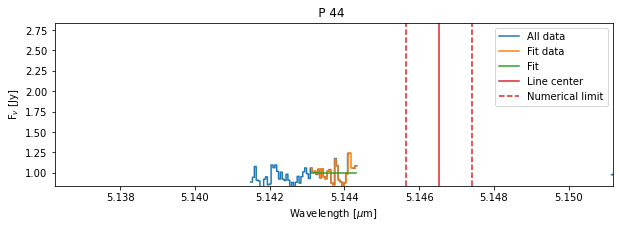

Is this fit okay? [y or n]n


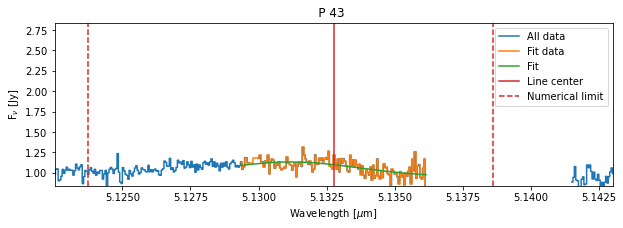

Is this fit okay? [y or n]n


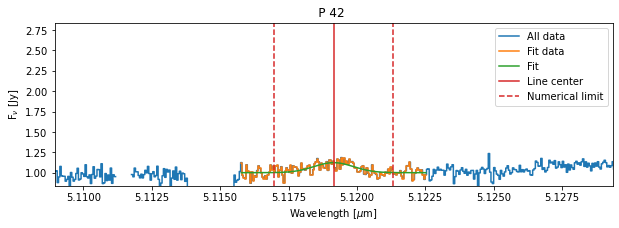

Is this fit okay? [y or n]n


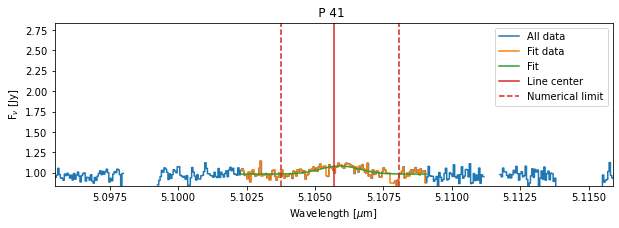

Is this fit okay? [y or n]n


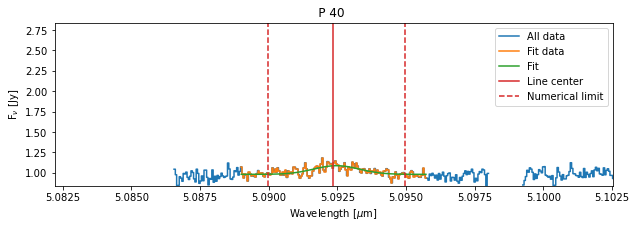

Is this fit okay? [y or n]n


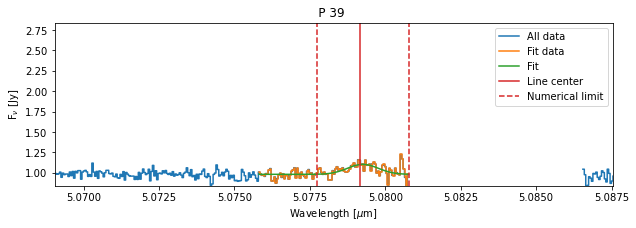

Is this fit okay? [y or n]n


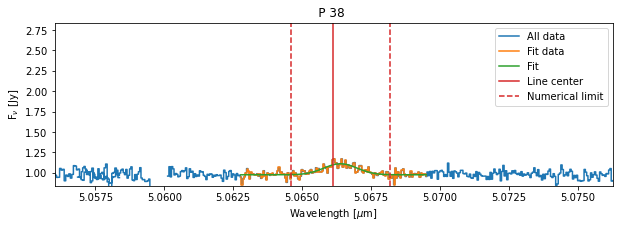

Is this fit okay? [y or n]y


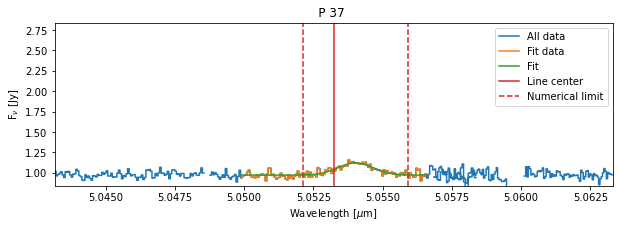

Is this fit okay? [y or n]y


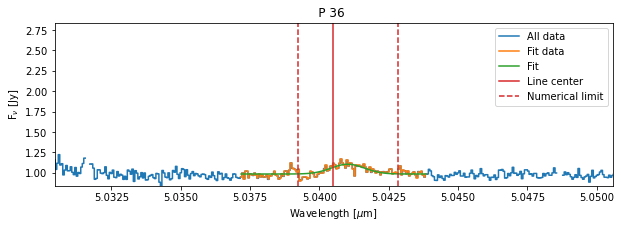

Is this fit okay? [y or n]
Is this fit okay? Please enter y or n.y


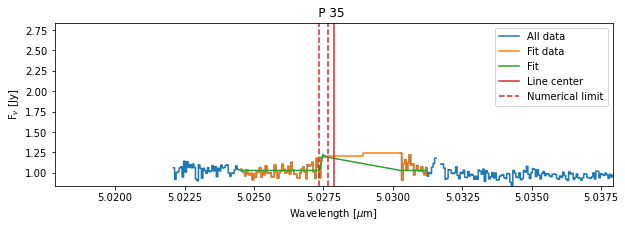

Is this fit okay? [y or n]n


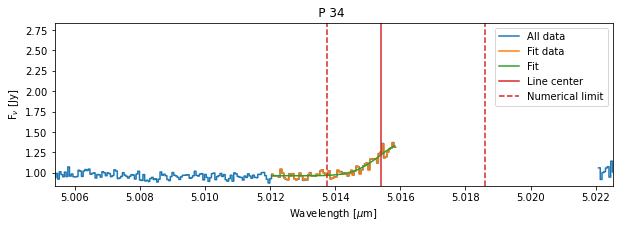

Is this fit okay? [y or n]n


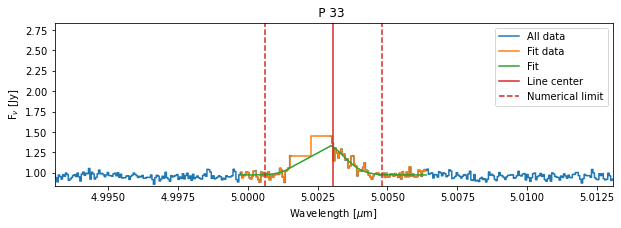

Is this fit okay? [y or n]n


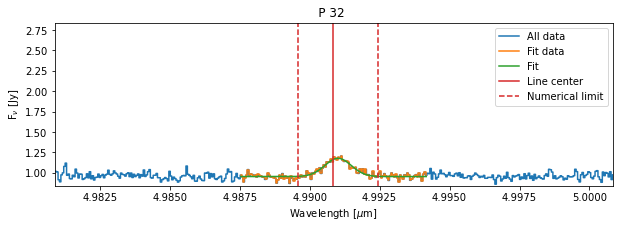

Is this fit okay? [y or n]y


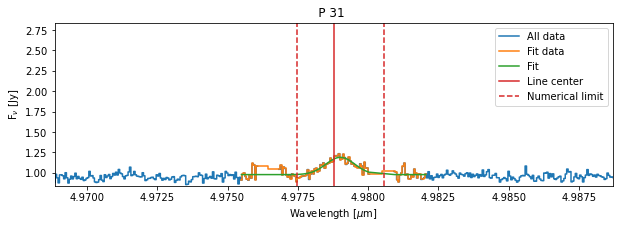

Is this fit okay? [y or n]y


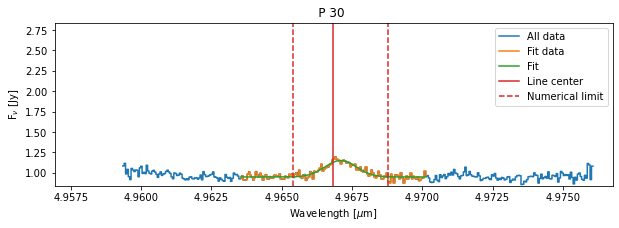

Is this fit okay? [y or n]y


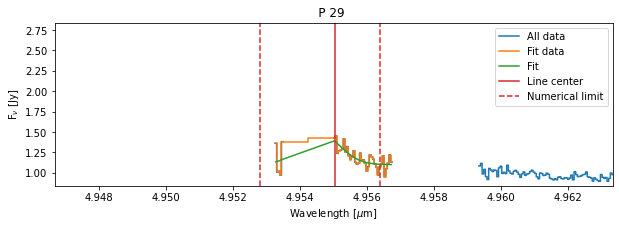

Is this fit okay? [y or n]n
Not enough data near  4.943362712860107  microns. Skipping.
Not enough data near  4.931819438934326  microns. Skipping.
Not enough data near  4.920405387878418  microns. Skipping.
Not enough data near  4.909119129180908  microns. Skipping.
Not enough data near  4.8979597091674805  microns. Skipping.
Not enough data near  4.886926174163818  microns. Skipping.
Not enough data near  4.876017093658447  microns. Skipping.
Not enough data near  4.865231990814209  microns. Skipping.
Not enough data near  4.854569911956787  microns. Skipping.
Not enough data near  4.844029426574707  microns. Skipping.


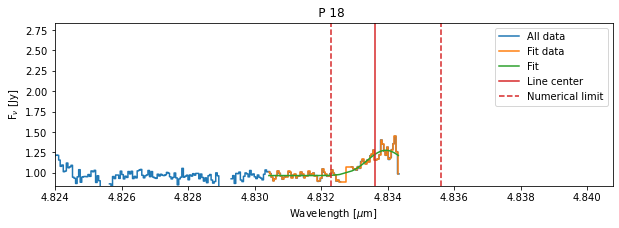

Is this fit okay? [y or n]n


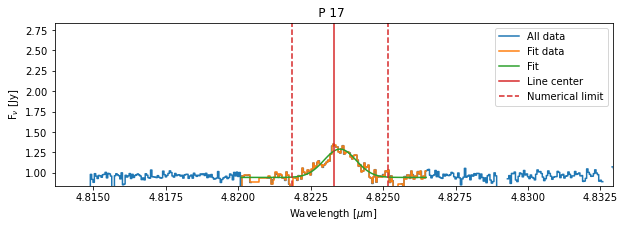

Is this fit okay? [y or n]y


/Users/belaarwen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/belaarwen/opt/anaconda3/lib/python3.9/site-packages/spectools_ir/flux_calculator/helpers.py:188: RuntimeWarning: Mean of empty slice
  dwave=np.nanmean(np.diff(myx[mybool]))


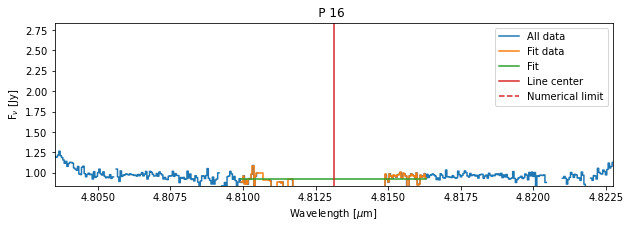

Is this fit okay? [y or n]n


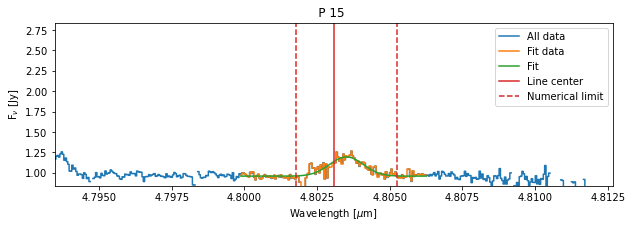

Is this fit okay? [y or n]y


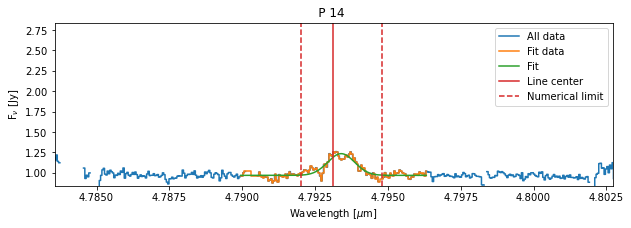

Is this fit okay? [y or n]y


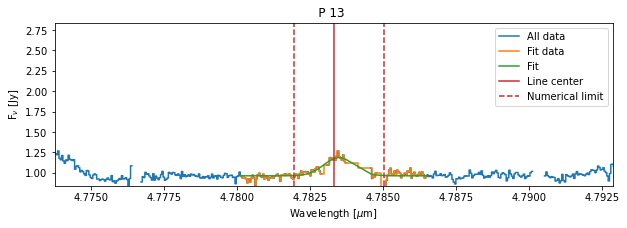

Is this fit okay? [y or n]y


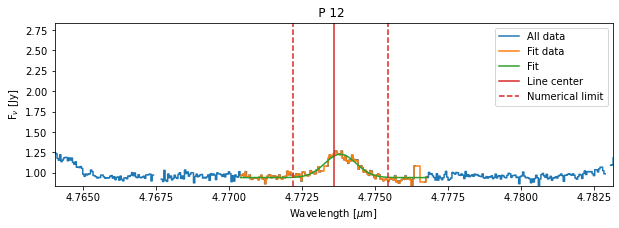

Is this fit okay? [y or n]y


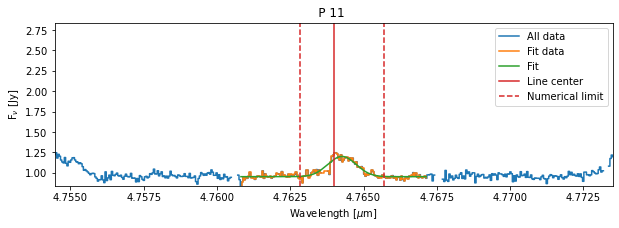

Is this fit okay? [y or n]y


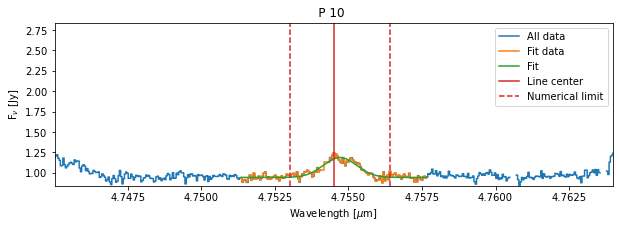

Is this fit okay? [y or n]y


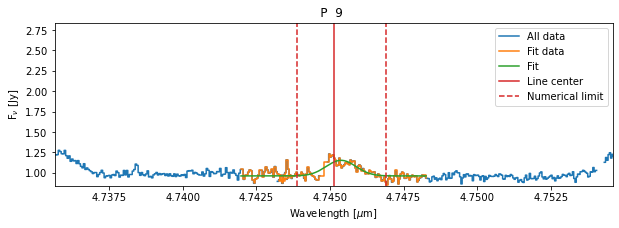

Is this fit okay? [y or n]y


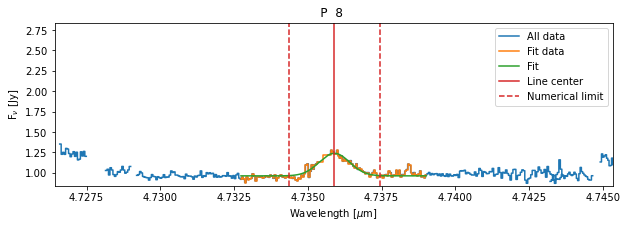

Is this fit okay? [y or n]y


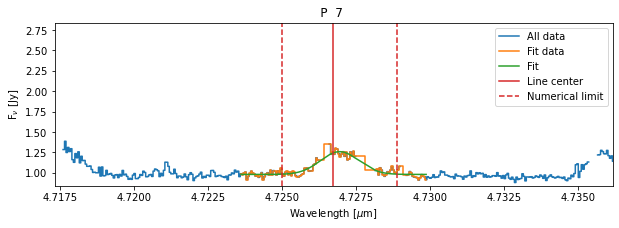

Is this fit okay? [y or n]y


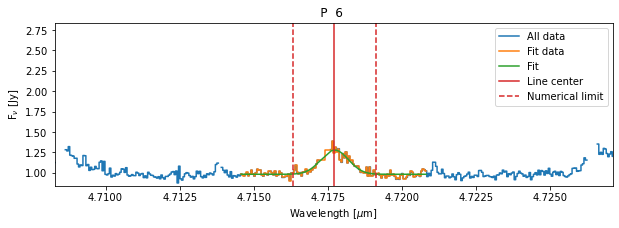

Is this fit okay? [y or n]y


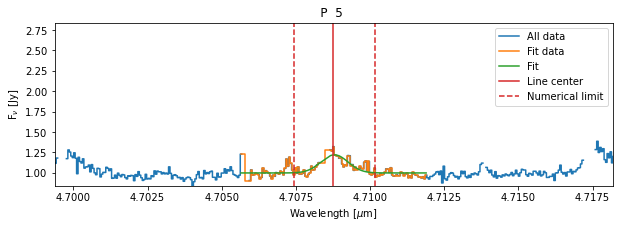

Is this fit okay? [y or n]y


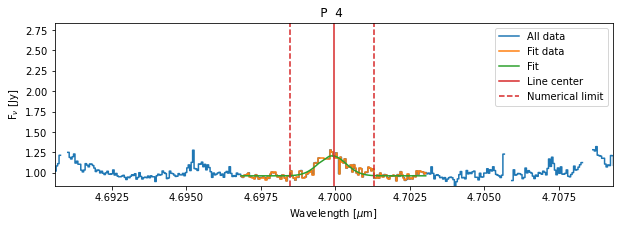

Is this fit okay? [y or n]y


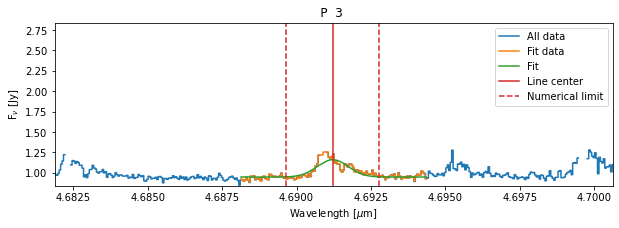

Is this fit okay? [y or n]y


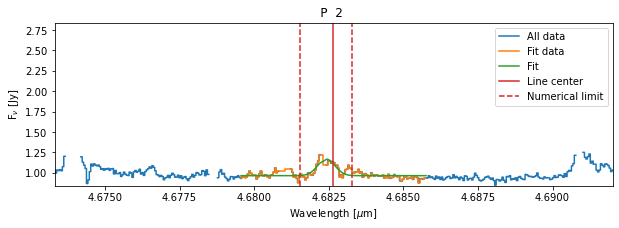

Is this fit okay? [y or n]y


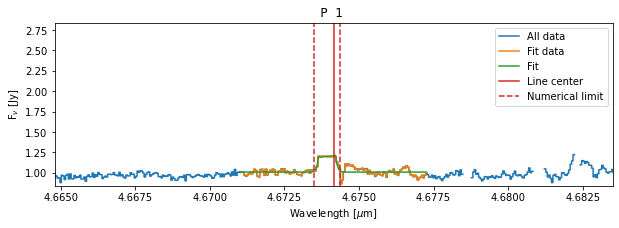

Is this fit okay? [y or n]y


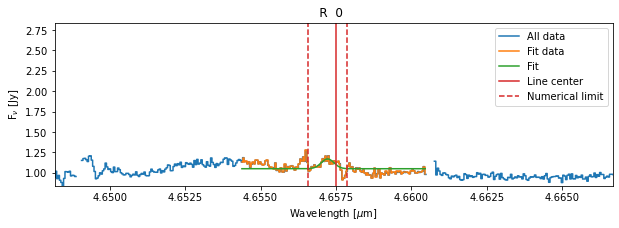

Is this fit okay? [y or n]n


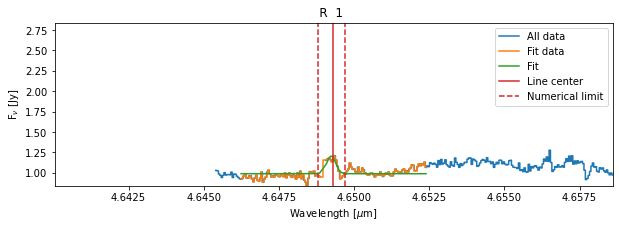

Is this fit okay? [y or n]y
Not enough data near  4.641242027282715  microns. Skipping.
Not enough data near  4.633276462554932  microns. Skipping.
Not enough data near  4.625414848327637  microns. Skipping.
Not enough data near  4.6176557540893555  microns. Skipping.
Not enough data near  4.60999870300293  microns. Skipping.
Not enough data near  4.602443695068359  microns. Skipping.


In [3]:
#lineflux_data=calc_fluxes(wave,flux,hitran_data_CO, v_dop=0,fwhm_v=40.,sep_v=200.,cont=1.05,vet_fits=True, plot=True)
#pickle.dump(lineflux_data,open('lineflux_data.p','wb')) #save for convenience


lineflux_data=pickle.load(open('lineflux_data.p','rb'))  #restore lineflux_data if you don't want to re-run

Can P 9 be used as a good fit or no?

In [6]:
au=1.5e11
#Make slab model
#This can take a few seconds to run.  It is primarily limited by the convolution time.
model_output=make_spec('H2O',1e22,1000,np.pi*(0.3*au)**2., wmin=4.58,wmax=5.2,convol_fwhm=30.,d_pc=140.,res=1e-5) # play with convol_fwhm (broader for IQ tau?)

Reading partition function from:  https://hitran.org/data/Q/q1.txt


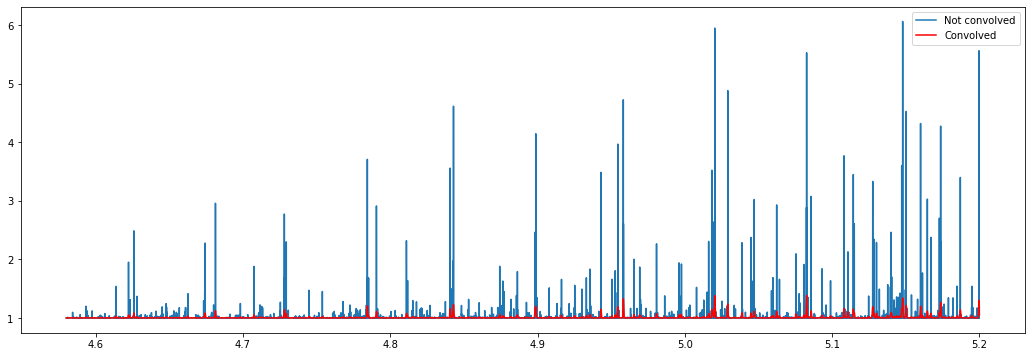

In [7]:
#Plot slab model
fig=plt.figure(figsize=(18,6))
ax1=fig.add_subplot(111)
ax1.plot(model_output['spectrum']['wave'],model_output['spectrum']['flux']+1,label='Not convolved')
ax1.plot(model_output['spectrum']['wave'],model_output['spectrum']['convolflux']+1,'r',label='Convolved')
ax1.legend()

In [8]:
rd_model=make_rotation_diagram(model_output['lineparams'])
rd_data=make_rotation_diagram(lineflux_data)

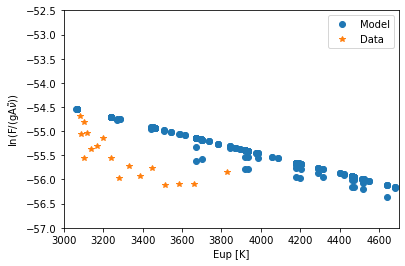

In [9]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(rd_model['x'],rd_model['y'],' C0o',label='Model')
ax1.plot(rd_data['x'],rd_data['y'],' C1*',label='Data')
ax1.set_xlabel('Eup [K]')
ax1.set_ylabel(r'ln(F/(gA$\tilde{\nu}$))')
ax1.set_xlim(3000,4700)
ax1.set_ylim(-57,-52.5)
ax1.legend()